In [2]:
#!pip install gymnasium pygame numpy

In [18]:
#import required libraries
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [19]:
#Task 1 : Train a CartPole Agent
env = gym.make("CartPole-v1")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

In [20]:
# Hyperparameters
learning_rate = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 500
max_steps = 500

In [21]:
# Discretization helper
def discretize_state(state, bins=(6, 12, 6, 12)):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], np.radians(50)]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -np.radians(50)]
    ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
    new_obs = [int(round((bins[i] - 1) * ratios[i])) for i in range(len(state))]
    new_obs = [min(bins[i] - 1, max(0, new_obs[i])) for i in range(len(state))]
    return tuple(new_obs)

bins = (6, 12, 6, 12)
q_table = np.random.uniform(low=-1, high=1, size=(bins[0], bins[1], bins[2], bins[3], action_size))

In [16]:
rewards_cartpole = []

In [22]:
# Training loop
for episode in range(episodes):
    state, _ = env.reset()
    state_disc = discretize_state(state)
    total_reward = 0

    for step in range(max_steps):
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state_disc])

        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state_disc = discretize_state(next_state)

        # Q-learning update
        best_next_action = np.argmax(q_table[next_state_disc])
        td_target = reward + gamma * q_table[next_state_disc][best_next_action]
        td_error = td_target - q_table[state_disc][action]
        q_table[state_disc][action] += learning_rate * td_error

        state_disc = next_state_disc
        total_reward += reward

        if terminated or truncated:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_cartpole.append(total_reward)

    if episode % 50 == 0:
        print(f"CartPole - Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")

print("CartPole Training complete!")

CartPole - Episode 0, Reward: 22.0, Epsilon: 0.995
CartPole - Episode 50, Reward: 26.0, Epsilon: 0.774
CartPole - Episode 100, Reward: 13.0, Epsilon: 0.603
CartPole - Episode 150, Reward: 28.0, Epsilon: 0.469
CartPole - Episode 200, Reward: 17.0, Epsilon: 0.365
CartPole - Episode 250, Reward: 11.0, Epsilon: 0.284
CartPole - Episode 300, Reward: 18.0, Epsilon: 0.221
CartPole - Episode 350, Reward: 25.0, Epsilon: 0.172
CartPole - Episode 400, Reward: 11.0, Epsilon: 0.134
CartPole - Episode 450, Reward: 9.0, Epsilon: 0.104
CartPole Training complete!


In [23]:
# Task 2: MountainCar with Q-Learning
env = gym.make("MountainCar-v0")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

In [24]:
# Discretization bins
state_bins = (18, 14)
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))

In [25]:
# Helper to discretize state
def discretize_mc_state(state):
    ratios = [(state[i] - state_bounds[i][0]) / (state_bounds[i][1] - state_bounds[i][0]) for i in range(len(state))]
    new_obs = [int(round((state_bins[i] - 1) * ratios[i])) for i in range(len(state))]
    new_obs = [min(state_bins[i] - 1, max(0, new_obs[i])) for i in range(len(state))]
    return tuple(new_obs)

# Initialize Q-table
q_table_mc = np.random.uniform(low=-1, high=1, size=(state_bins[0], state_bins[1], action_size))

In [26]:
# Hyperparameters
episodes = 2000
learning_rate = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01

In [27]:
rewards_mc = []

In [28]:
# Training loop
for episode in range(episodes):
    state, _ = env.reset()
    state_disc = discretize_mc_state(state)
    total_reward = 0

    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table_mc[state_disc])

        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state_disc = discretize_mc_state(next_state)

        # Q-learning update
        best_next_action = np.argmax(q_table_mc[next_state_disc])
        td_target = reward + gamma * q_table_mc[next_state_disc][best_next_action]
        td_error = td_target - q_table_mc[state_disc][action]
        q_table_mc[state_disc][action] += learning_rate * td_error

        state_disc = next_state_disc
        total_reward += reward

        if terminated or truncated:
            done = True

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_mc.append(total_reward)

    if episode % 200 == 0:
        print(f"MountainCar - Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")

print("MountainCar Training complete!")

MountainCar - Episode 0, Reward: -200.0, Epsilon: 0.995
MountainCar - Episode 200, Reward: -200.0, Epsilon: 0.365
MountainCar - Episode 400, Reward: -200.0, Epsilon: 0.134
MountainCar - Episode 600, Reward: -200.0, Epsilon: 0.049
MountainCar - Episode 800, Reward: -200.0, Epsilon: 0.018
MountainCar - Episode 1000, Reward: -200.0, Epsilon: 0.010
MountainCar - Episode 1200, Reward: -200.0, Epsilon: 0.010
MountainCar - Episode 1400, Reward: -200.0, Epsilon: 0.010
MountainCar - Episode 1600, Reward: -200.0, Epsilon: 0.010
MountainCar - Episode 1800, Reward: -162.0, Epsilon: 0.010
MountainCar Training complete!


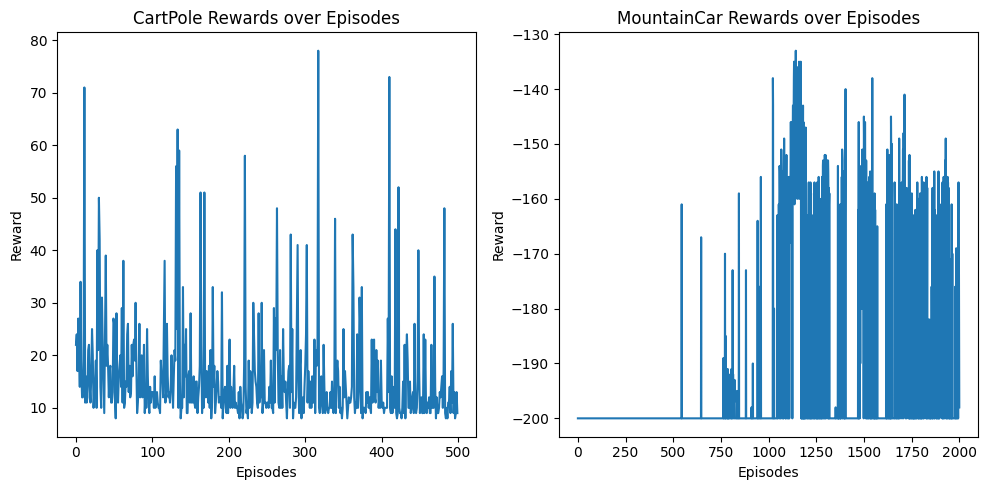

In [30]:
#plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(rewards_cartpole)
plt.title("CartPole Rewards over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Reward")

plt.subplot(1, 2, 2)
plt.plot(rewards_mc)
plt.title("MountainCar Rewards over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Reward")

plt.tight_layout()
plt.show()